# Phase 3 Code Challenge Review

Agenda:
- Gradient Descent & Cost Function
- Logistic Regression
- Evaluation Metrics
- Decision Trees

## Part I. Gradient Descent & Cost Function
- What is a cost function? What are we trying to find?
- How to use gd to find the lowest point? How does the gradient change as we get closer to the bottom?
- What's the role learning rate play? How can learning rate affect your result? 


<p style='text-align:center;font-size:20px'>$ \theta_j := \theta_j - \alpha * \frac{\partial J(\theta)}{\partial\theta_i} $</p>

1. A cost function is a function that gives a measure of how wrong a model is in terms of its ability to estimate the relationship between x and y. We are always trying to minimize this function. It basically represents error.
-------------------------------------------------------------------------------------------------------------------------------------------------------
2. Gradient Descent uses derivatives and partial derivatives in order to minimize the cost function. You start at a chosen point on a vector, and then iteratively move it in the direction that makes it minimize the cost function the most. It updates the weights of the model coefficients (using backpropogation in more complicated models). As we get closer to the bottom of the curve, we find that the gradient descent gets flatter and flatter (the value of the derivative is being reduced in magnitude)

- It starts randomly at the cost function curve, and at each given point it evaluates the derivative. It then updates the parameter (you are taking the derivative of the function with respect to the parameter) in order to reduce the magnitude of the derivative.
-------------------------------------------------------------------------------------------------------------------------------------------------------
3. Learning rate controls how quickly the model adapts to our problem. It configures how much of a 'step' the gradient descent algorithm takes before estimating error and updating the weight of the model coefficients. Larger steps means it will adapt faster, but we may end up with a suboptimal model (it might overshoot or undershoot). Smaller steps means it will adapt slower, but is more fine-tuned, however if the dataset is too large and the learning rate is too small, then the process may never end

<Figure size 576x576 with 0 Axes>

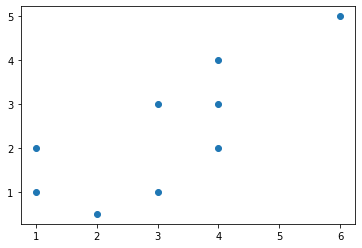

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
x = [1, 1, 2, 3, 4, 3, 4, 6, 4]
y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]
plt.figure(figsize = (8,8))
fig, ax = plt.subplots()

ax.scatter(x,y)
plt.show()

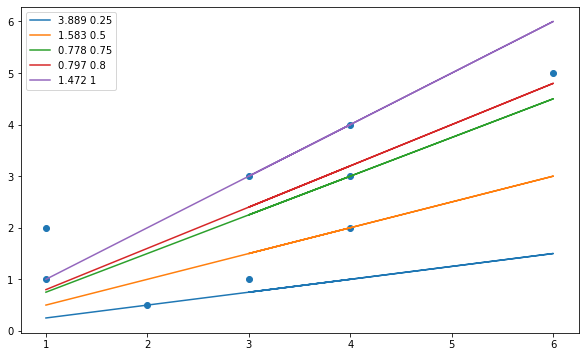

In [2]:
beta_0 = 0
beta_1 = [.25, .5, .75, .8, 1,]
#beta_1 = np.arange(0.25,3,0.1)
fig, ax = plt.subplots(figsize=(10,6))
mses = []
for t in beta_1:
    line = beta_0 + (np.array(x)*t)
    mse = round(mean_squared_error(y, line),3)
    mses.append(mse)
    ax.plot(x, line, label=f'{mse} {t}')
ax.scatter(x,y)
plt.legend()
plt.show()

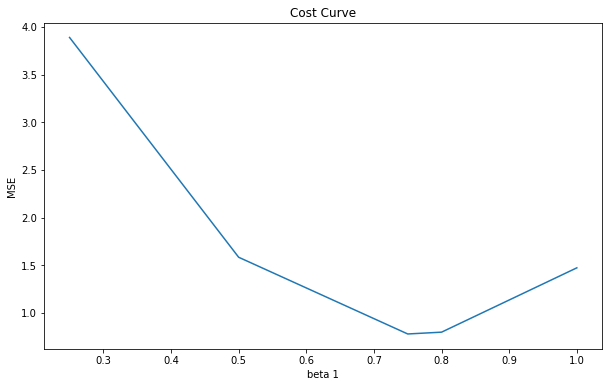

In [3]:
# Plot the Cost Curve
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(beta_1, mses)
ax.set_title('Cost Curve')
ax.set_xlabel('beta 1')
ax.set_ylabel('MSE')
plt.show()

## Part II. Logistic Regression 
- How does linear regression differ from logistic regression?
- Why is logistic regression better at modeling a binary outcome?
- What are some advantages and disadvantages of logistic regression?

1. Logistic regression is used in lieu of linear regression when we experience data that has binary classification. It classifies the data based on conditional probability! A sigmoid function is a common logistic function.
- The output of a logistic regression is a probability between 0 and 1
- The output of a linear regression is a continuous number, ranging between -inf and +inf, depending on the predictors.

2. Logistic regression is better at modeling a binary outcome because rather than predicting exact values (which is not feasable with binary data), it classifies data based on probability. Linear regression would not be able to do this properly, because the model would be predicting values that lie between the binary classifications, which don't even exist.

3. Logistic regression gives us coefficients that we can use to analyze the model better. It is a parametric learning model. This means that you are making assumptions about the data. Follows a certain distribution, predictors are not correlated, random sample, (i think there are more). Logistic regression also generalizes really well to test data. Hard to overfit.
- A decision tree is non-parametric. 

LOOK UP BIAS-VARIANCE TRADEOFF

## Part III. Evaluation Metrics 
- What are precision and recall?
- How to evaluate a logistic regression model?
- What is roc auc curve?
- What is class imbalance and how do we deal with it?

1. Precision: It checks this question "What proportion of positive identifications was actually correct? Out of the ones you predict are positive, how many are actually positive?
             
             
              NUMBER OF TRUE POSITIVES / NUMBER OF PREDICTED POSITIVES   TP / (TP + FP)
   
   
   
   Recall: What proportion of actual positives were identified correctly? Out of all the ones that are actually positive in the world, how many did you actually predict?
              
              
              NUMBER OF TRUE POSITIVES / NUMBER OF ACTUAL TOTAL POSITIVES    TP / (TP + FN)

2. To evaluate a logistic regression model, you will want to use a confusion matrix in order to evaluate the evaluation metrics! Then, depending on the problem, you can evaluate your model.

3. The ROC-AUC curve plots the true positive rate vs the false positive rate at every possible threshhold. We want to maximize true positive rate and minimize false positive rate. The larger the area under the curve, the better the model!!

<img src = 'confusion_matrix.png' width = 300>

In [5]:
### calculate precision here

precision = 63 / (15 + 63)
print(precision)

0.8076923076923077


In [6]:
### calculate recall here
recall = 63 / (63+22)
print(recall)

0.7411764705882353


In [7]:
### calculate accuracy here
acc = (123 + 63) / (123 + 15 + 22 + 63)
print(acc)

0.8340807174887892


In [8]:
### calculate specificity here
spec = 123 / (123 + 15)
print(spec)

# TRUE NEGATIVES / FALSE POSITIVES
# OUT OF ALL THE NEGATIVES OUT THERE IN THE WORLD, HOW MANY DID YOU 
# SUCCESSFULLY PICK OUT?

0.8913043478260869


**Explain which model below has the best performance based on ROC-AUC curve? Why?**

<img src='roc_auc.png' width = 400>

### Class Imbalance
<img src = 'imbalanced.png' wid = 300>

What problem would it cause? 
- When the distribution of your target is heavily skewed, the model has trouble identifying the minority class

How to remedy it? describe some detailed solution
- You can bootstrap the minority class. (Basically you want to resample new data in the minority class to have roughly the same amount of observations of the majority). Bootstrap is resampling with replacement. It is NOT generating NEW data. That is SMOTE.
- You can undersample the majority
- You can change the weight of the classes (how much each class affects the model). So you would reduce the weight of the majority and increase the weight of the minority. 
- You can use SMOTE to generate new data. 
- TOMIC link (remove data from the majority class). This is not the same as undersampling.

## Part III. Decision Trees
- Build trees with the sklearn machine learning framework

In [11]:
# import the dataset and set up predictors and target
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# define x and y 
y = titanic['survived']
X = titanic[['pclass','age', 'sibsp', 'parch', 'fare',
     'adult_male']]

In [15]:
# fill the age columns missing value with mean 
X['age'].fillna(X['age'].mean(), inplace=True)

In [18]:
## check the info and see if it's ready to be modeled
X['age'].isna().sum()

0

In [25]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=29)
# THE FORMAT IS EXTREMELY IMPORTANT, OTHERWISE YOUR SPLITS ARE GONNA BE FUKED UP

In [26]:
# fit the tree
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=29)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=29)

In [27]:
# test the tree using .predict method
pred = tree_clf.predict(X_test)

In [28]:
# generate prediction and output metric (use accuracy)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print(accuracy_score(pred, y_test))
print(precision_score(pred, y_test))

0.8435754189944135
0.7619047619047619


LETS EVALUATE THE MODEL BY CREATING A BASELINE TO COMPARE IT TO

In [29]:
# how did our tree do? is it good or bad? how do you know?
np.bincount(y)

array([549, 342], dtype=int64)

In [ ]:
y.value_counts()

0    549
1    342
Name: survived, dtype: int64

If the value of our model is higher than the above model, its a decent model!